Name: `SHARON SAM S`

Roll No.: `215229137`

# Exploratory Data Anaysis on Possible Loan Defaulters

__`Loan Defaulting based on Customer Behaviour`__

### Import necessary modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv("Training Data.csv")

### Explore the data set

In [3]:
print("A glimpse at the dataset:")
df.head()

A glimpse at the dataset:


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
rows, columns = df.shape
print('Rows =', rows)
print('Columns =', columns)
print('Size =', df.size)

Rows = 252000
Columns = 13
Size = 3276000


In [5]:
print("Summary of the dataset:\n")
df.info()

Summary of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
print("Descriptive Statistics of the dataset:\n")
df.describe(include='all')

Descriptive Statistics of the dataset:



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.00,252000.00,252000.00,252000.00,252000,252000,252000,252000,252000,252000,252000.00,252000.00,252000.00
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.50,4997116.67,49.95,10.08,NaN,NaN,NaN,NaN,NaN,NaN,6.33,12.00,0.12
std,72746.28,2878311.01,17.06,6.00,NaN,NaN,NaN,NaN,NaN,NaN,3.65,1.40,0.33
min,1.00,10310.00,21.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10.00,0.00
25%,63000.75,2503015.00,35.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,3.00,11.00,0.00
50%,126000.50,5000694.50,50.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,6.00,12.00,0.00
75%,189000.25,7477502.00,65.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,9.00,13.00,0.00


#### Identify missing values:

In [7]:
df.isnull().sum().sum()

0

`No missing values are found`

# Analysing the dataset

## 1. How many total no. of customers who are Defaulters and who are Non-Defaulters?

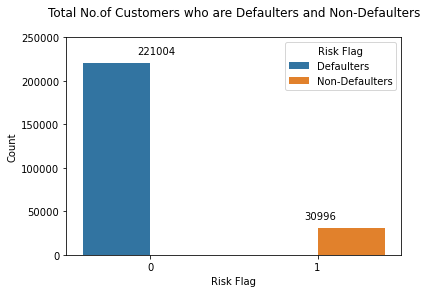

In [8]:
data = df.groupby('Risk_Flag').count()['Id']

ax = sns.countplot(data=df, x='Risk_Flag', hue='Risk_Flag')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Defaulters','Non-Defaulters'], title='Risk Flag')

for index,value in enumerate(data):
    plt.text(index-0.08, value+10000, str(value))
    
plt.ylabel('Count')
plt.xlabel('Risk Flag')
plt.ylim(0,250000)
plt.title('Total No.of Customers who are Defaulters and Non-Defaulters\n')
plt.show()

`Total No.of Customers who are Defaulters = 221004`

`Total No.of Customers who are Non-Defaulters = 30996`

## 2. What is the maximum, minimum and average Income of the customers who are likely to default the loans?

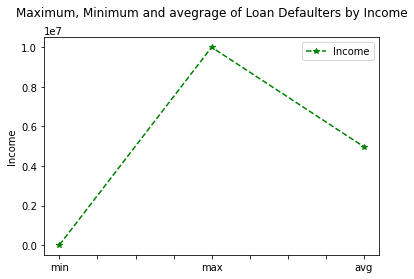

In [9]:
Defaulters_df = df[df['Risk_Flag'] == 1]
Defaulters_income = Defaulters_df['Income'].values

min = Defaulters_income.min(0)
max = Defaulters_income.max(0)
avg = Defaulters_income.mean(0)

data_income = {'Names':['min','max','avg'],'Income':[min, max, avg]}

Defaulters_income_df = pd.DataFrame(data_income)

Defaulters_income_df.plot('Names', 'Income', color='green', marker='*', linestyle='--')

plt.ylabel('Income')
plt.xlabel('')
plt.title('Maximum, Minimum and avegrage of Loan Defaulters by Income\n')
plt.show()

`Minimum Income of Loan Defaulters is around 10,000`

`Maximum Income of Loan Defaulters is around 1,00,00,000`

`Avegrage Income of Loan Defaulters is around 50,00,000`

## 3. What is the maximum, minimum and average Age of the customers who are likely to default the loans?

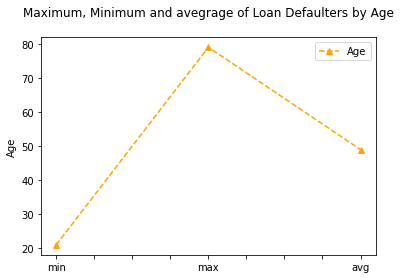

In [10]:
Defaulters_df = df[df['Risk_Flag'] == 1]
Defaulters_age = Defaulters_df['Age'].values

min = Defaulters_age.min(0)
max = Defaulters_age.max(0)
avg = Defaulters_age.mean(0)

data_age = {'Names':['min','max','avg'],'Age':[min, max, avg]}

Defaulters_age_df = pd.DataFrame(data_age)

Defaulters_age_df.plot('Names', 'Age', color='orange', marker='^', linestyle='--')

plt.ylabel('Age')
plt.xlabel('')
plt.title('Maximum, Minimum and avegrage of Loan Defaulters by Age\n')
plt.show()

`Minimum Income of Loan Defaulters is around 20`

`Maximum Income of Loan Defaulters is around 80`

`Avegrage Income of Loan Defaulters is around 50`

## 4. What is the total percentage of customers who are likely to default by Marital Status?

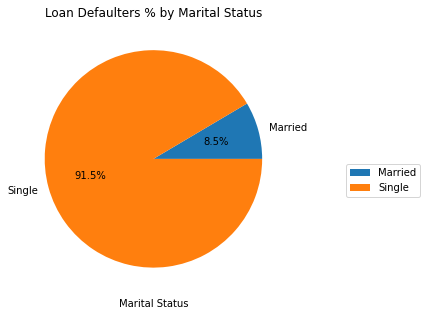

In [11]:
marital_status = df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']

marital_status.plot(kind='pie', 
                    startangle=0, 
                    labels=['Married','Single'], 
                    autopct='%1.1f%%', 
                    figsize=(5,5))

plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Loan Defaulters % by Marital Status')
plt.legend(loc='best', bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

`Total % Customers who are Married to default loans is 8.5%`

`Total % Customers who are Single to default loans is 91.5%`

## 5. Which among the house ownerships (i.e., who have rented a house or owned a house or neither of it) of the customers are more likely to default?

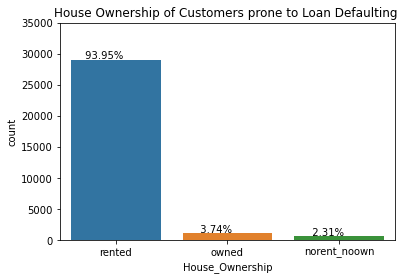

In [12]:
Defaulters_df = df[df['Risk_Flag'] == 1]
Defaulters_df['House_Ownership']

p1 = sns.countplot(Defaulters_df['House_Ownership'])

for p in p1.patches:
        p1.annotate('{:6.2f}%'.format(p.get_height()/len(Defaulters_df['House_Ownership'])*100), 
                    (p.get_x()+0.1, p.get_height()+50))
        
plt.ylim(0,35000)
plt.title('House Ownership of Customers prone to Loan Defaulting ')
plt.show()

`Rented among the house ownerships of the customers are more likely to default as it has 93.95% coverage of the data`

## 6. What is the total percentage of Customers about their car ownerships (i.e., who have a Car and who does not) who are more likely to default?

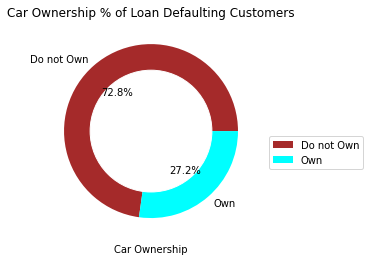

In [13]:
car_ownership_default = df.loc[df['Risk_Flag'] == 1].groupby('Car_Ownership').count()['Id']

total = sum(car_ownership_default)
data_per = car_ownership_default/total*100

plt.pie(data_per, colors=['brown','cyan'], labels=['Do not Own','Own'],autopct='%1.1f%%')
circle = plt.Circle( (0,0), 0.7, color='white')

p = plt.gcf()
p.gca().add_artist(circle)

plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of Loan Defaulting Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

`Total % of Customers about their car ownerships who are more likely to default is those who do not own a car which is 72.8%`

## 7. What are top 5 Professions of mean Income that are prone to Loan Defaulting?

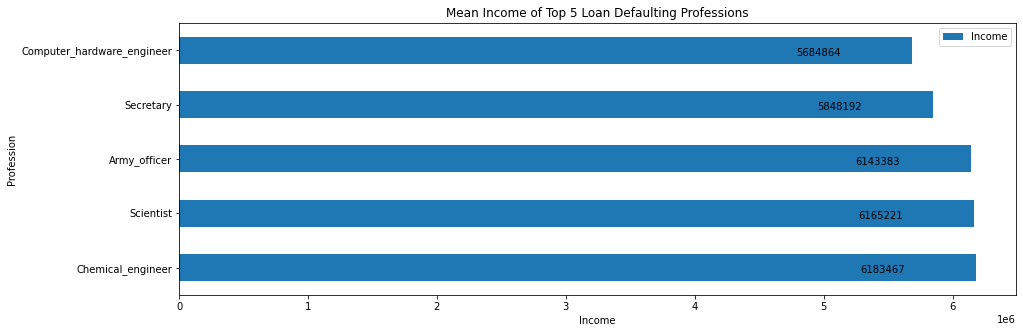

In [14]:
df_ = df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)

df_.sort_values(by='Income',ascending=False)[:5].plot(kind='barh',figsize=(15,5))

plt.title('Mean Income of Top 5 Loan Defaulting Professions') 
plt.xlabel('Income')
plt.ylabel('Profession')

for index,value in enumerate(df_['Income'][:5]):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

`Top 5 Professions of mean Income that are prone to Loan Defaulting are as follows : `

`Computer Hardware Engineer` , `Secretary` , `Army Officer` , `Scientist` , `Chemical Engineer`

## 8. What are top 3 States who took Loan?

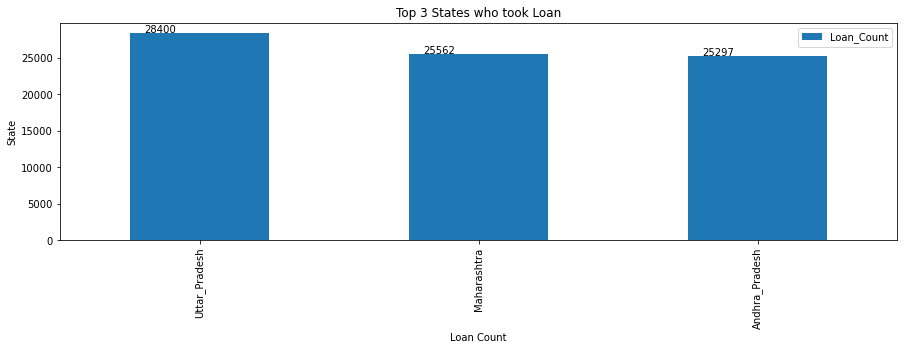

In [15]:
df_profession_loan_count = df.groupby('STATE').count()['Id'].sort_values(ascending=False)
df_plc = df_profession_loan_count.reset_index()
df_plc.rename(columns= {'Id':'Loan_Count'},inplace=True)

df_plc[:3].plot(kind='bar', x='STATE', figsize=(15,4))

plt.legend(loc='best')
plt.title('Top 3 States who took Loan')
plt.xlabel('Loan Count')
plt.ylabel('State')

for index,value in enumerate(df_plc['Loan_Count'][:3]):
    plt.text(index-0.2,value+50,str(value))
plt.show()   

`Top 3 States who took loan are as follows : `

`Uttar Pradesh` , `Maharastra` , `Andhra Pradesh`

## 9. Which year of current job of the customer that is the most liable to default loan?

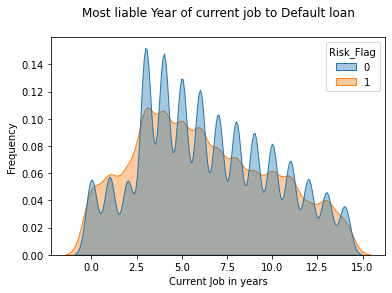

In [16]:
sns.kdeplot(data=df, x="CURRENT_JOB_YRS", hue="Risk_Flag", fill=True, common_norm=False, alpha=0.4)

plt.ylabel('Frequency')
plt.xlabel('Current Job in years')
plt.title('Most liable Year of current job to Default loan\n')
plt.show()

`3 years of current job of the customer that is the most liable to default loan as the frequency of distribution is high in this region`

## 10. Which year of stay in current house of the customer that is the most liable to default loan?

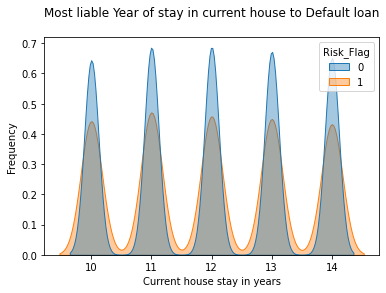

In [17]:
sns.kdeplot(data=df, x="CURRENT_HOUSE_YRS", hue="Risk_Flag", fill=True, common_norm=False, alpha=0.4)

plt.ylabel('Frequency')
plt.xlabel('Current house stay in years')
plt.title('Most liable Year of stay in current house to Default loan\n')
plt.show()

In [18]:
Defaulters_df = df[df['Risk_Flag'] == 1]
Defaulters = Defaulters_df['CURRENT_HOUSE_YRS']
Defaulters.mode()

0    11
dtype: int64

`However all the years are likely liable.`

``But 11 years of stay in current house of the customer that is the most liable to default loan as the frequency of distribution is high in this region``

__END__